# Convolutional Neural Networks

The standard when it comes to Computer vision

`Convolutional Layer` can detect abstract ideas in an image

- `Image Classification`
- `Object Detection`

Output of Convolution is called a `Feature Map` (**a mapping from the activations of detected features from the input layer**  )

[A Practical Guide to Machine Learning with TensorFlow 2.0 & Keras](https://frontendmasters.com/courses/practical-machine-learning/image-processing-with-keras/)

In [1]:
import tensorflow as tf
from tensorflow import keras

/Users/charlotte/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
print(tf.__version__)
print(keras.__version__)

2.20.0
3.10.0


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

`x_train` input data, `y_train` labels

In [4]:
import numpy as np
np.set_printoptions(linewidth=5000)
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

`0` is black, numbers closer to `255` are increasing in intensity to white

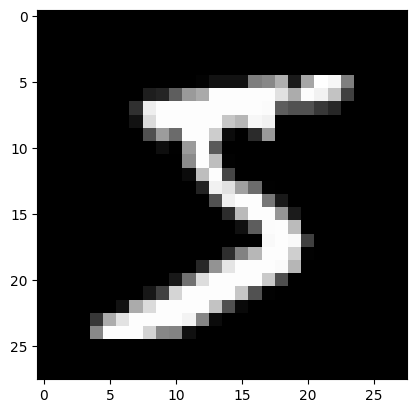

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap="gray")
plt.show()

In [6]:
print(y_train[0])

5


We need to work with **floating point** numbers rather than 0 - 255

In [7]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten 

`Dense` - all neurons in one layer will be connected to neurons of the next layer

`Flatten` - 2D image flattened 

- One long input array of 784 pixels
- input_shape is telling the model what data structure to expect
- No additional parameters (weights or biases) in this layer

In [9]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.summary()

/Users/charlotte/Library/Python/3.9/lib/python/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.add(Dense(units=256, activation="relu"))
model.add(Dense(units=10, activation="softmax"))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

- every neuron will see the whole image (all 256 pixels)
- the following layer will only have 10 neurons however these are connected to all 256 neurons

In [17]:
import visualkeras
visualkeras.layered_view(model)





AttributeError: 'Flatten' object has no attribute 'output_shape'

<iframe width="560" height="315" src="https://www.youtube.com/embed/ZBfpkepdZlw?si=wW0MtuM47yMhSmYk" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

In [18]:
from tensorflow import keras
import visualkeras
from IPython.display import display

# Reuse existing `model` if defined; otherwise create the MNIST MLP
try:
    model  # noqa: F821
except NameError:
    model = keras.Sequential([
        keras.Input(shape=(28, 28)),
        keras.layers.Flatten(),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dense(10, activation="softmax"),
    ])

img = visualkeras.layered_view(
    model,
    legend=True,
    show_dimension=True,
    sizing_mode="balanced",
)

display(img)

# Save a copy to your site images folder
img.save("/Users/charlotte/charlotte.computer/images/mnist_mlp.png")



AttributeError: 'Flatten' object has no attribute 'output_shape'

In [ ]:
%pip install -U pydot graphviz



In [19]:
import keras
from keras.utils import plot_model
from IPython.display import Image, display

# Reuse existing `model` if defined; otherwise create the MNIST MLP
try:
    model  # noqa: F821
except NameError:
    model = keras.Sequential([
        keras.Input(shape=(28, 28)),
        keras.layers.Flatten(),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dense(10, activation="softmax"),
    ])

out_path = "/Users/charlotte/charlotte.computer/images/mnist_mlp_graph.png"
plot_model(
    model,
    to_file=out_path,
    show_shapes=True,
    show_layer_names=True,
    rankdir="LR",
    dpi=200,
)

display(Image(filename=out_path))



You must install pydot (`pip install pydot`) for `plot_model` to work.


FileNotFoundError: [Errno 2] No such file or directory: '/Users/charlotte/charlotte.computer/images/mnist_mlp_graph.png'